In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
winedf= pd.read_excel('1613779-Red_wine_.xlsx')
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
winedf.shape

(1599, 12)

In [5]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [6]:
winedf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
winedf.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide     True
density                 False
pH                       True
sulphates               False
alcohol                 False
quality                  True
dtype: bool

In [8]:
winedf.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide     True
density                 False
pH                       True
sulphates               False
alcohol                 False
quality                  True
dtype: bool

In [9]:
winedf[winedf['total sulfur dioxide'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.8,10.5,5.0


In [10]:
winedf[winedf['pH'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.997,NaN,0.58,9.3,6.0


In [11]:
winedf[winedf['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.71,0.0,2.6,0.08,11.0,34.0,0.9976,3.44,0.53,9.5,NaN


In [12]:
winedf=winedf.dropna()

In [13]:
winedf.isna().any() 

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [14]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   float64
dtypes: float64(12)
memory usage: 162.1 KB


In [15]:
winedf['quality']= winedf['quality'].astype('int')

In [153]:
winedf['quality'].unique().sort

<function ndarray.sort>

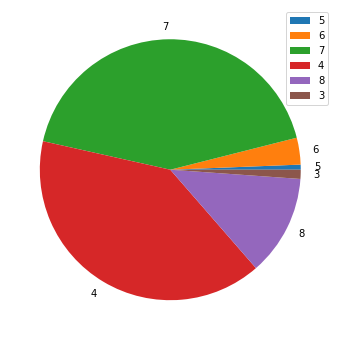

In [163]:
piev=winedf.groupby('quality')[['quality']].count()
piev.columns=['count']
plt.figure(figsize=(8,6))
plt.pie(piev['count'],labels=winedf['quality'].unique())
plt.legend(winedf['quality'].unique())

In [18]:
# finding the upper and lower limit of quality columns 
#
def find_outlier_limits(col_name):
    Q1,Q3=winedf[col_name].quantile([.25,.75])
    IQR=Q3-Q1
    low=Q1-(1.5* IQR)
    high=Q3+(1.5* IQR)
    return (high,low)

high_Q,low_Q=find_outlier_limits('quality')
print('quality: ','upper limit: ',high_Q,' lower limit: ',low_Q)



quality:  upper limit:  7.5  lower limit:  3.5


#### Finding the Excellent Wines

In [19]:
winedf[winedf['quality']>high_Q]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.52,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.52,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.52,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,3.52,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.52,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.52,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.52,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.52,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.52,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.52,0.74,12.7,8


#### Finding the Poor Wines

In [20]:
winedf[winedf['quality']<low_Q]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.52,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.52,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.52,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.52,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.52,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.52,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.52,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.52,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.52,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.52,0.63,9.95,3


## Data Visualisation 

<Figure size 720x576 with 0 Axes>

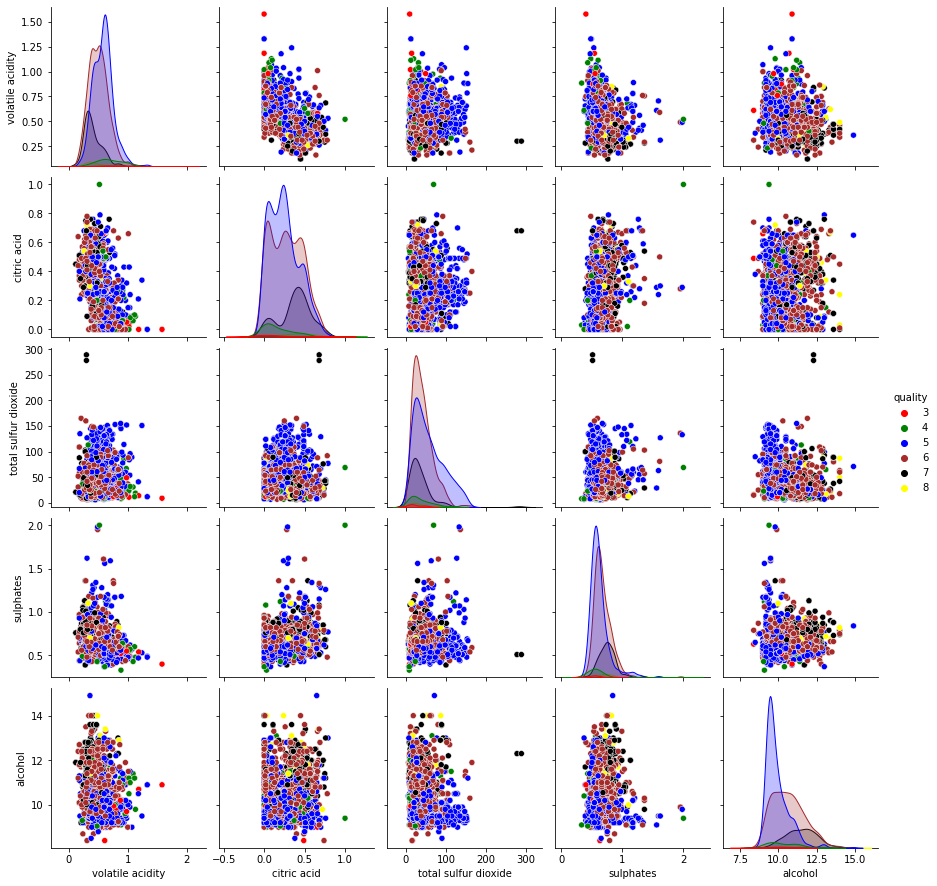

In [72]:
plt.figure(figsize=(10,8))
sns.pairplot(data=winedf[['volatile acidity','citric acid','total sulfur dioxide','sulphates','alcohol','quality']],hue='quality',palette=['red','green','blue','brown','black','yellow'])

### Relation between Volatile Acidity & Quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

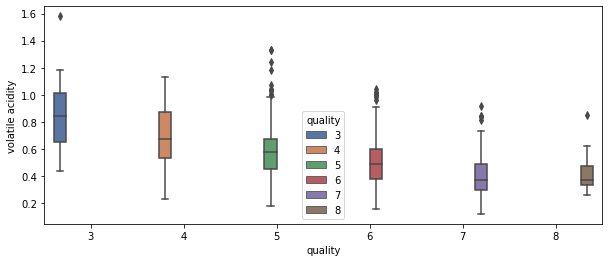

In [169]:
plt.figure(figsize=(10,4))
sns.boxplot(data=winedf,x='quality',y='volatile acidity',hue='quality',palette='deep')

#### Insights:- 
Higher Quality of wines have lesser quantity of volatile acidity in them.

### Relation between Fixed Acidity & Quality

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

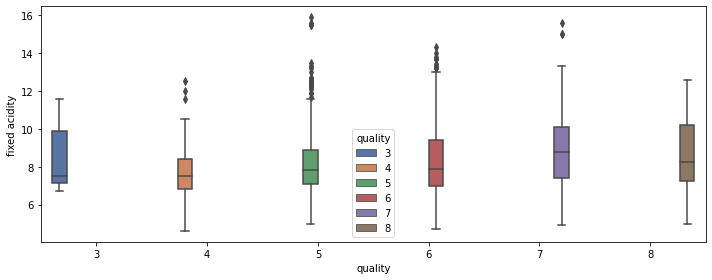

In [190]:
plt.figure(figsize=(10,4))
sns.boxplot(data=winedf,x='quality',y='fixed acidity',hue='quality',palette='deep')

#### Insights:- 
In this box plot, we cannot find a clear relation between the fixed acidity and the quality of wine.

### Relation between Citric Acid & Quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

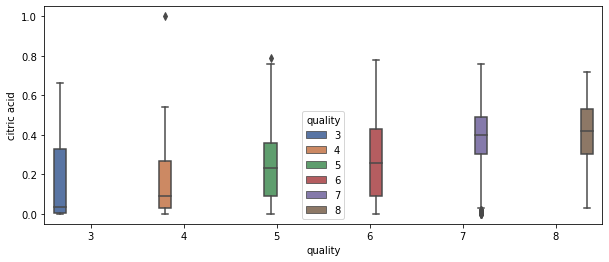

In [167]:
plt.figure(figsize=(10,4))
sns.boxplot(data=winedf,x='quality',y='citric acid',hue='quality',palette='deep')

#### Insights:- 
Higher Quality of wine contains generally higher levels of citric acid

### Relation between Alcohol & Quality

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

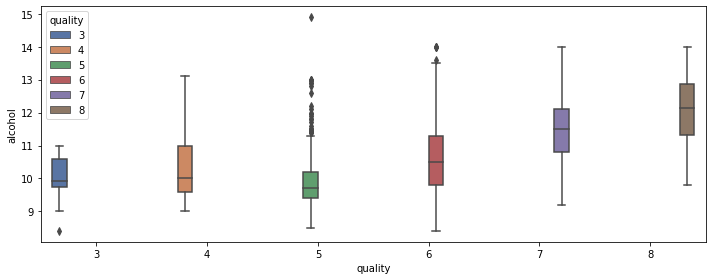

In [189]:
plt.figure(figsize=(10,4))
sns.boxplot(data=winedf,x='quality',y='alcohol',hue='quality',palette='deep')

#### Insights:-
Higher quality  of wine contains generally higher levels of Alcohol.

### Relation between denstiy & Quality

<AxesSubplot:xlabel='quality', ylabel='density'>

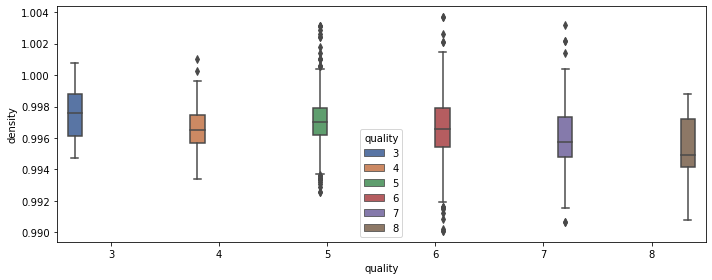

In [195]:
plt.figure(figsize=(10,4))
sns.boxplot(data=winedf,x='quality',y='density',hue='quality',palette='deep')

<AxesSubplot:>

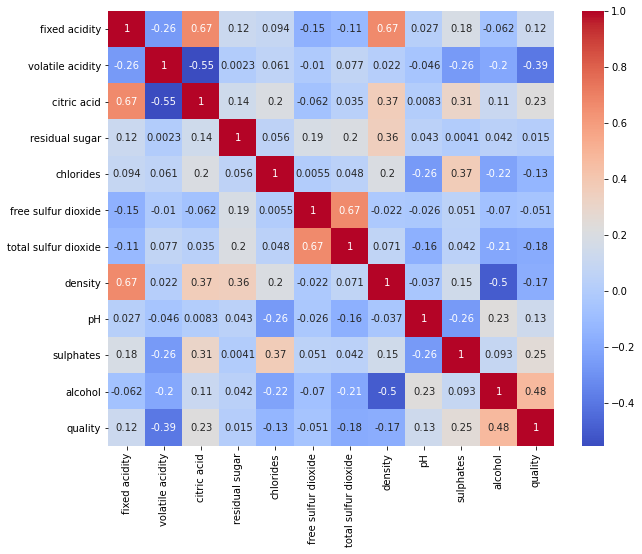

In [32]:
corr_df=winedf.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

In [34]:
from sklearn.model_selection import train_test_split as tts 

In [35]:
#The correlation of the columns dropped below except quality are with quality column is very less and so are discarded
X=winedf.drop(['quality','residual sugar','free sulfur dioxide','pH','density','fixed acidity','chlorides'], axis='columns')
Y=winedf.quality
X_train, X_test, Y_train, Y_test= tts(X,Y,test_size=0.2,random_state=0)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit_transform(X_train)
scale.fit(X_test)

MinMaxScaler()

In [55]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [56]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
KNN.score(X_test,Y_test)

0.58125

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
Y_pred=KNN.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[  1,   0,   0,   0,   0],
       [  0,   1,   7,   2,   0],
       [  0,   4, 106,  28,   6],
       [  0,   2,  49,  65,  10],
       [  0,   0,  11,  15,  13]], dtype=int64)

Text(42.0, 0.5, 'Truth')

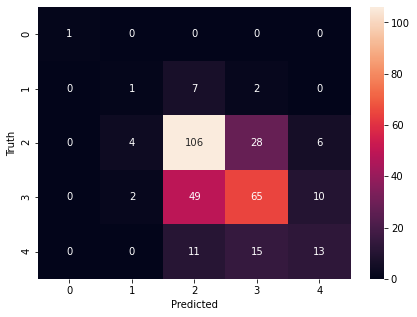

In [60]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')